1. IMPORTING LIBS AND **PACKAGES**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
np.expand_dims??

In [ ]:
os.path.join('/content/train.csv')

'/content/train.csv'

In [ ]:
data= pd.read_csv('train.csv', engine='python', encoding='utf8', error_bad_lines=False)

In [ ]:
data.iloc[555]['comment_text']

'"\n\n Image \n\n Image deletion warning Image:Metroid Prime Hunter title screen, top display.jpg has been listed at Wikipedia:Images and media for deletion. If you feel that this image should not be deleted, please go there to voice your opinion.\n 16:31, August 31, 2005 (UTC)"'

In [ ]:
data[data.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

2. PREPROCESSING


In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X=data['comment_text']
Y=data[data.columns[2:]].values

In [ ]:
X

0       Explanation\nWhy the edits made under my usern...
1       D'aww! He matches this background colour I'm s...
2       Hey man, I'm really not trying to edit war. It...
3       "\nMore\nI can't make any real suggestions on ...
4       You, sir, are my hero. Any chance you remember...
                              ...                        
7163    "\n\n Please do not vandalize pages, as you di...
7164    "\n I don't know the context, but you might fi...
7165    Your source come from a Greek anti Albanian we...
7166    There are no third party sources. And the ones...
7167    Good idea. Let's continue the discussion at Ta...
Name: comment_text, Length: 7168, dtype: object

In [ ]:
Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
data.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
data[data.columns[2:].values]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7163,0,0,0,0,0,0
7164,0,0,0,0,0,0
7165,0,0,0,0,0,0
7166,0,0,0,0,0,0


In [ ]:
MAX_FEATURES=200000

In [ ]:
vectorizer=TextVectorization(max_tokens = MAX_FEATURES,
                             output_sequence_length=1800,
                             output_mode='int')

In [ ]:
type(X.values)

numpy.ndarray

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'i',
 'you',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'are',
 'have',
 'with',
 'your',
 'if',
 'was',
 'article',
 'or',
 'but',
 'page',
 'my',
 'an',
 'do',
 'by',
 'from',
 'at',
 'me',
 'about',
 'so',
 'what',
 'can',
 'wikipedia',
 'there',
 'all',
 'has',
 'will',
 'would',
 'like',
 'its',
 'one',
 'no',
 'talk',
 'just',
 'please',
 'they',
 'he',
 'any',
 'been',
 'dont',
 'which',
 'we',
 'his',
 'other',
 'more',
 'here',
 'see',
 'should',
 'some',
 'who',
 'also',
 'im',
 'because',
 'know',
 'think',
 'how',
 'then',
 'up',
 'why',
 'edit',
 'were',
 'out',
 'am',
 'people',
 'only',
 'articles',
 'fuck',
 'ass',
 'use',
 'sex',
 'go',
 'did',
 'now',
 'when',
 'their',
 'time',
 'being',
 'may',
 'than',
 'get',
 'thanks',
 'even',
 'make',
 'hate',
 'them',
 'had',
 'information',
 'good',
 'could',
 'well',
 'very',
 'first',
 'deletion',
 'sources',
 'way',
 'want',
 'yourself',


In [ ]:
vectorizer("Hello World!")

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([318, 281,   0, ...,   0,   0,   0])>

In [ ]:
TextVectorization??

In [ ]:
vectorized_text=vectorizer(X.values)

In [ ]:
vectorized_text

<tf.Tensor: shape=(7168, 1800), dtype=int64, numpy=
array([[  688,    76,     2, ...,     0,     0,     0],
       [29691,    54,  1912, ...,     0,     0,     0],
       [  507,   434,    69, ...,     0,     0,     0],
       ...,
       [   22,   132,   215, ...,     0,     0,     0],
       [   41,    19,    49, ...,     0,     0,     0],
       [  105,   366,   547, ...,     0,     0,     0]])>

In [ ]:
len(X)

7168

In [ ]:
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,Y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [ ]:
dataset.as_numpy_iterator().next()

(array([[2094,   22,  117, ...,    0,    0,    0],
        [   8,   19,   94, ...,    0,    0,    0],
        [1591,    8,  186, ...,    0,    0,    0],
        ...,
        [ 790,   25,    4, ...,    0,    0,    0],
        [  12,   45,  298, ...,    0,    0,    0],
        [   7,   89,   15, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [ ]:
batch_X,batch_Y=dataset.as_numpy_iterator().next()

In [ ]:
batch_X.shape

(16, 1800)

In [ ]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.9))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
len(test)

44

In [ ]:
train_gen=train.as_numpy_iterator()


In [ ]:
train_gen.next()

(array([[  475,     7,   147, ...,     0,     0,     0],
        [15311, 17182, 26287, ...,     0,     0,     0],
        [ 3852, 31845, 17768, ...,     0,     0,     0],
        ...,
        [    7,    82,   161, ...,     0,     0,     0],
        [22964,    38,     6, ...,     0,     0,     0],
        [    7,    72,  3366, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

3 .BUILD DEEP NEURAL NETWORK

In [ ]:
!pip install Sequential

  Preparing metadata (setup.py) ... done
  Created wheel for Sequential: filename=sequential-1.0.0-py3-none-any.whl size=2856 sha256=150d170cdabe8dda8f9ff656f6599a683436d3df5ebd3e5724eea15a88eafbf8
  Stored in directory: /root/.cache/pip/wheels/c3/61/56/fe456787532527aafb108ffeceecb4a2e928a518c88bbdd5c5
Successfully built Sequential


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional,Dense,Embedding

In [ ]:
model=Sequential()
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [ ]:
history=model.fit(train,epochs=1,validation_data=val)

313/313 [==============================] - 562s 2s/step - loss: 0.1491 - val_loss: 0.0856


In [ ]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

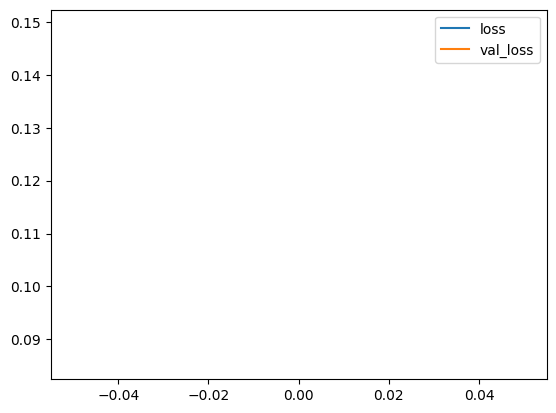

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show(9)

4. MAKING **PREDICTION**

In [ ]:
input_text=vectorizer('You freaking suck! I am going to fuck you.')

In [ ]:
data.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
batch=test.as_numpy_iterator().next()

In [ ]:
test.as_numpy_iterator().next()

(array([[  23,   41,    9, ...,    0,    0,    0],
        [   3,   38,  138, ...,    0,    0,    0],
        [   7,   19, 8975, ...,    0,    0,    0],
        ...,
        [  10,    9,   40, ...,    0,    0,    0],
        [1864, 1221,  742, ...,    0,    0,    0],
        [ 999, 1862,  128, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1]]))

In [ ]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 169ms/step


array([[0.9918866 , 0.38238728, 0.8986447 , 0.05439932, 0.906184  ,
        0.12764888]], dtype=float32)

In [ ]:
res=model.predict(batch_X)

1/1 [==============================] - 0s 205ms/step


In [ ]:
res.flatten().shape

(96,)

In [ ]:
np.expand_dims(input_text,0)

array([[   8, 7321, 1237, ...,    0,    0,    0]])

In [ ]:
batch_X,batch_Y=test.as_numpy_iterator().next()

In [ ]:
batch_Y

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 0s 376ms/step


array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
test=model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


5. MODEL **EVALUATION**

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa

In [ ]:
from tensorflow.keras.metrics  import Precision, Recall, CategoricalAccuracy

In [ ]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [ ]:
for batch in train.as_numpy_iterator():
    # unpack the batch
    X_true,Y_true= batch
    # make a prediction
    yhat=model.predict(X_true)
    # flatten the predicition
    Y_true=Y_true.flatten()
    yhat=yhat.flatten()

    pre.update_state(Y_true,yhat)
    re.update_state(Y_true,yhat)
    acc.update_state(Y_true,yhat)

In [ ]:
print(f' Precision:{pre.result().numpy()},\n Recall:{re.result()},\n Accuracy:{acc.result().numpy}')

 Precision:0.7667423486709595,
 Recall:0.748062014579773,
 Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.51984125>>


6. TEST AND GRADIO **APP**

In [ ]:
!pip install gradio

In [ ]:
!pip install matplotlib-venn

In [ ]:
# prompt: install libarchive

!apt-get update
!apt-get install libarchive-dev


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,333 kB]
Get:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,678 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://ppa.launchpadcontent.net/c2d4u.team/c2

In [ ]:
# prompt: Install GraphViz & PyDot

!apt-get install graphviz
!pip install pydot


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
# prompt: Install cartopy

!pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 29.0 MB/s eta 0:00:00


In [ ]:
!git clone https://huggingface.co/spaces/anzorq/finetuned_diffusion

Cloning into 'finetuned_diffusion'...
remote: Enumerating objects: 364, done.
remote: Counting objects: 100% (364/364), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 364 (delta 227), reused 364 (delta 227), pack-reused 0
Receiving objects: 100% (364/364), 129.17 KiB | 8.61 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [ ]:
%cd finetuned_diffusion

/content/finetuned_diffusion


In [ ]:
!ls

app.py	nsfw.png  README.md  requirements.txt  style.css  utils.py


In [ ]:
!pip install -r requirements.txt -q

In [ ]:
pip install xformers --no-binary :all:

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for xformers: filename=xformers-0.0.24-cp310-cp310-linux_x86_64.whl size=9800102 sha256=7812615898826c5221fab237437a33d4b48339356a4872505121b6188b610d42
  Stored in directory: /root/.cache/pip/wheels/f1/3d/73/1c2082a69c6d62fba4c64d0a027b48ac4df001f9461450311d
Successfully built xformers


In [ ]:
!pip install gradio -q

In [ ]:
pip install kaleido cohere openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: importlib_metadata
    Found existing installation: importlib-metadata 7.0.1
    Uninstalling importlib-metadata-7.0.1:
      Successfully uninstalled importlib-metadata-7.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
pip install ffmpy

In [ ]:
pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.1 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
from diffusers import AutoencoderKL, UNet2DConditionModel, StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, DPMSolverMultistepScheduler
import gradio as gr
import torch
from PIL import Image
import utils
import datetime
import time
import psutil
import random


start_time = time.time()
is_colab = utils.is_google_colab()
state = None
current_steps = 25

class Model:
    def __init__(self, name, path="", prefix=""):
        self.name = name
        self.path = path
        self.prefix = prefix
        self.pipe_t2i = None
        self.pipe_i2i = None

models = [
     Model("Arcane", "nitrosocke/Arcane-Diffusion", "arcane style "),
     Model("Dreamlike Diffusion 1.0", "dreamlike-art/dreamlike-diffusion-1.0", "dreamlikeart "),
     Model("Archer", "nitrosocke/archer-diffusion", "archer style "),
     Model("Anything V4", "andite/anything-v4.0", ""),
     Model("Modern Disney", "nitrosocke/mo-di-diffusion", "modern disney style "),
     Model("Classic Disney", "nitrosocke/classic-anim-diffusion", "classic disney style "),
     Model("Loving Vincent (Van Gogh)", "dallinmackay/Van-Gogh-diffusion", "lvngvncnt "),
     Model("Wavyfusion", "wavymulder/wavyfusion", "wa-vy style "),
     Model("Analog Diffusion", "wavymulder/Analog-Diffusion", "analog style "),
     Model("Redshift renderer (Cinema4D)", "nitrosocke/redshift-diffusion", "redshift style "),
     Model("Midjourney v4 style", "prompthero/midjourney-v4-diffusion", "mdjrny-v4 style "),
     Model("Waifu", "hakurei/waifu-diffusion"),
     Model("Cyberpunk Anime", "DGSpitzer/Cyberpunk-Anime-Diffusion", "dgs illustration style "),
     Model("Elden Ring", "nitrosocke/elden-ring-diffusion", "elden ring style "),
     Model("TrinArt v2", "naclbit/trinart_stable_diffusion_v2"),
     Model("Spider-Verse", "nitrosocke/spider-verse-diffusion", "spiderverse style "),
     Model("Balloon Art", "Fictiverse/Stable_Diffusion_BalloonArt_Model", "BalloonArt "),
     Model("Tron Legacy", "dallinmackay/Tron-Legacy-diffusion", "trnlgcy "),
     Model("Pokémon", "lambdalabs/sd-pokemon-diffusers"),
     Model("Pony Diffusion", "AstraliteHeart/pony-diffusion"),
     Model("Robo Diffusion", "nousr/robo-diffusion"),
     Model("Epic Diffusion", "johnslegers/epic-diffusion")
  ]

custom_model = None
if is_colab:
  models.insert(0, Model("Custom model"))
  custom_model = models[0]

last_mode = "txt2img"
current_model = models[1] if is_colab else models[0]
current_model_path = current_model.path

if is_colab:
  pipe = StableDiffusionPipeline.from_pretrained(
      current_model.path,
      torch_dtype=torch.float16,
      scheduler=DPMSolverMultistepScheduler.from_pretrained(current_model.path, subfolder="scheduler"),
      safety_checker=lambda images, clip_input: (images, False)
      )

else:
  pipe = StableDiffusionPipeline.from_pretrained(
      current_model.path,
      torch_dtype=torch.float16,
      scheduler=DPMSolverMultistepScheduler.from_pretrained(current_model.path, subfolder="scheduler")
      )

if torch.cuda.is_available():
  pipe = pipe.to("cuda")
  pipe.enable_xformers_memory_efficient_attention()

device = "GPU 🔥" if torch.cuda.is_available() else "CPU 🥶"

def error_str(error, title="Error"):
    return f"""#### {title}
            {error}"""  if error else ""

def update_state(new_state):
  global state
  state = new_state

def update_state_info(old_state):
  if state and state != old_state:
    return gr.update(value=state)

def custom_model_changed(path):
  models[0].path = path
  global current_model
  current_model = models[0]

def on_model_change(model_name):

  prefix = "Enter prompt. \"" + next((m.prefix for m in models if m.name == model_name), None) + "\" is prefixed automatically" if model_name != models[0].name else "Don't forget to use the custom model prefix in the prompt!"

  return gr.update(visible = model_name == models[0].name), gr.update(placeholder=prefix)

def on_steps_change(steps):
  global current_steps
  current_steps = steps

def pipe_callback(step: int, timestep: int, latents: torch.FloatTensor):
    update_state(f"{step}/{current_steps} steps")#\nTime left, sec: {timestep/100:.0f}")

def inference(model_name, prompt, guidance, steps, n_images=1, width=512, height=512, seed=0, img=None, strength=0.5, neg_prompt=""):

  update_state(" ")

  print(psutil.virtual_memory()) # print memory usage

  global current_model
  for model in models:
    if model.name == model_name:
      current_model = model
      model_path = current_model.path

  # generator = torch.Generator('cuda').manual_seed(seed) if seed != 0 else None
  if seed == 0:
    seed = random.randint(0, 2147483647)

  generator = torch.Generator('cuda').manual_seed(seed)

  try:
    if img is not None:
      return img_to_img(model_path, prompt, n_images, neg_prompt, img, strength, guidance, steps, width, height, generator, seed), f"Done. Seed: {seed}"
    else:
      return txt_to_img(model_path, prompt, n_images, neg_prompt, guidance, steps, width, height, generator, seed), f"Done. Seed: {seed}"
  except Exception as e:
    return None, error_str(e)

def txt_to_img(model_path, prompt, n_images, neg_prompt, guidance, steps, width, height, generator, seed):

    print(f"{datetime.datetime.now()} txt_to_img, model: {current_model.name}")

    global last_mode
    global pipe
    global current_model_path
    if model_path != current_model_path or last_mode != "txt2img":
        current_model_path = model_path

        update_state(f"Loading {current_model.name} text-to-image model...")

        if is_colab or current_model == custom_model:
          pipe = StableDiffusionPipeline.from_pretrained(
              current_model_path,
              torch_dtype=torch.float16,
              scheduler=DPMSolverMultistepScheduler.from_pretrained(current_model.path, subfolder="scheduler"),
              safety_checker=lambda images, clip_input: (images, False)
              )
        else:
          pipe = StableDiffusionPipeline.from_pretrained(
              current_model_path,
              torch_dtype=torch.float16,
              scheduler=DPMSolverMultistepScheduler.from_pretrained(current_model.path, subfolder="scheduler")
              )
          # pipe = pipe.to("cpu")
          # pipe = current_model.pipe_t2i

        if torch.cuda.is_available():
          pipe = pipe.to("cuda")
          pipe.enable_xformers_memory_efficient_attention()
        last_mode = "txt2img"

    prompt = current_model.prefix + prompt
    result = pipe(
      prompt,
      negative_prompt = neg_prompt,
      num_images_per_prompt=n_images,
      num_inference_steps = int(steps),
      guidance_scale = guidance,
      width = width,
      height = height,
      generator = generator,
      callback=pipe_callback)

    # update_state(f"Done. Seed: {seed}")

    return replace_nsfw_images(result)

def img_to_img(model_path, prompt, n_images, neg_prompt, img, strength, guidance, steps, width, height, generator, seed):

    print(f"{datetime.datetime.now()} img_to_img, model: {model_path}")

    global last_mode
    global pipe
    global current_model_path
    if model_path != current_model_path or last_mode != "img2img":
        current_model_path = model_path

        update_state(f"Loading {current_model.name} image-to-image model...")

        if is_colab or current_model == custom_model:
          pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
              current_model_path,
              torch_dtype=torch.float16,
              scheduler=DPMSolverMultistepScheduler.from_pretrained(current_model.path, subfolder="scheduler"),
              safety_checker=lambda images, clip_input: (images, False)
              )
        else:
          pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
              current_model_path,
              torch_dtype=torch.float16,
              scheduler=DPMSolverMultistepScheduler.from_pretrained(current_model.path, subfolder="scheduler")
              )
          # pipe = pipe.to("cpu")
          # pipe = current_model.pipe_i2i

        if torch.cuda.is_available():
          pipe = pipe.to("cuda")
          pipe.enable_xformers_memory_efficient_attention()
        last_mode = "img2img"

    prompt = current_model.prefix + prompt
    ratio = min(height / img.height, width / img.width)
    img = img.resize((int(img.width * ratio), int(img.height * ratio)), Image.LANCZOS)
    result = pipe(
        prompt,
        negative_prompt = neg_prompt,
        num_images_per_prompt=n_images,
        image = img,
        num_inference_steps = int(steps),
        strength = strength,
        guidance_scale = guidance,
        # width = width,
        # height = height,
        generator = generator,
        callback=pipe_callback)

    # update_state(f"Done. Seed: {seed}")

    return replace_nsfw_images(result)

def replace_nsfw_images(results):

    if is_colab:
      return results.images

    for i in range(len(results.images)):
      if results.nsfw_content_detected[i]:
        results.images[i] = Image.open("nsfw.png")
    return results.images

# css = """.finetuned-diffusion-div div{display:inline-flex;align-items:center;gap:.8rem;font-size:1.75rem}.finetuned-diffusion-div div h1{font-weight:900;margin-bottom:7px}.finetuned-diffusion-div p{margin-bottom:10px;font-size:94%}a{text-decoration:underline}.tabs{margin-top:0;margin-bottom:0}#gallery{min-height:20rem}
# """
with gr.Blocks(css="style.css") as demo:
    gr.HTML(
        f"""
            <div class="finetuned-diffusion-div">
              <div>
                <h1>Finetuned Diffusion</h1>
              </div>
              <p>
               Demo for multiple fine-tuned Stable Diffusion models, trained on different styles: <br>
               <a href="https://huggingface.co/nitrosocke/Arcane-Diffusion">Arcane</a>, <a href="https://huggingface.co/nitrosocke/archer-diffusion">Archer</a>, <a href="https://huggingface.co/nitrosocke/elden-ring-diffusion">Elden Ring</a>, <a href="https://huggingface.co/nitrosocke/spider-verse-diffusion">Spider-Verse</a>, <a href="https://huggingface.co/nitrosocke/mo-di-diffusion">Modern Disney</a>, <a href="https://huggingface.co/nitrosocke/classic-anim-diffusion">Classic Disney</a>, <a href="https://huggingface.co/dallinmackay/Van-Gogh-diffusion">Loving Vincent (Van Gogh)</a>, <a href="https://huggingface.co/nitrosocke/redshift-diffusion">Redshift renderer (Cinema4D)</a>, <a href="https://huggingface.co/prompthero/midjourney-v4-diffusion">Midjourney v4 style</a>, <a href="https://huggingface.co/hakurei/waifu-diffusion">Waifu</a>, <a href="https://huggingface.co/lambdalabs/sd-pokemon-diffusers">Pokémon</a>, <a href="https://huggingface.co/AstraliteHeart/pony-diffusion">Pony Diffusion</a>, <a href="https://huggingface.co/nousr/robo-diffusion">Robo Diffusion</a>, <a href="https://huggingface.co/DGSpitzer/Cyberpunk-Anime-Diffusion">Cyberpunk Anime</a>, <a href="https://huggingface.co/dallinmackay/Tron-Legacy-diffusion">Tron Legacy</a>, <a href="https://huggingface.co/Fictiverse/Stable_Diffusion_BalloonArt_Model">Balloon Art</a> + in colab notebook you can load any other Diffusers 🧨 SD model hosted on HuggingFace 🤗.
              </p>
              <p>You can skip the queue and load custom models in the colab: <a href="https://colab.research.google.com/gist/qunash/42112fb104509c24fd3aa6d1c11dd6e0/copy-of-fine-tuned-diffusion-gradio.ipynb"><img data-canonical-src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" src="https://camo.githubusercontent.com/84f0493939e0c4de4e6dbe113251b4bfb5353e57134ffd9fcab6b8714514d4d1/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667"></a></p>
               Running on <b>{device}</b>{(" in a <b>Google Colab</b>." if is_colab else "")}
              </p>
              <p>You can also duplicate this space and upgrade to gpu by going to settings:<br>
              <a style="display:inline-block" href="https://huggingface.co/spaces/anzorq/finetuned_diffusion?duplicate=true"><img src="https://img.shields.io/badge/-Duplicate%20Space-blue?labelColor=white&style=flat&logo=data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAP5JREFUOE+lk7FqAkEURY+ltunEgFXS2sZGIbXfEPdLlnxJyDdYB62sbbUKpLbVNhyYFzbrrA74YJlh9r079973psed0cvUD4A+4HoCjsA85X0Dfn/RBLBgBDxnQPfAEJgBY+A9gALA4tcbamSzS4xq4FOQAJgCDwV2CPKV8tZAJcAjMMkUe1vX+U+SMhfAJEHasQIWmXNN3abzDwHUrgcRGmYcgKe0bxrblHEB4E/pndMazNpSZGcsZdBlYJcEL9Afo75molJyM2FxmPgmgPqlWNLGfwZGG6UiyEvLzHYDmoPkDDiNm9JR9uboiONcBXrpY1qmgs21x1QwyZcpvxt9NS09PlsPAAAAAElFTkSuQmCC&logoWidth=14" alt="Duplicate Space"></a></p>
            </div>
        """
    )
    with gr.Row():

        with gr.Column(scale=55):
          with gr.Group():
              model_name = gr.Dropdown(label="Model", choices=[m.name for m in models], value=current_model.name)
              with gr.Box(visible=False) as custom_model_group:
                custom_model_path = gr.Textbox(label="Custom model path", placeholder="Path to model, e.g. nitrosocke/Arcane-Diffusion", interactive=True)
                gr.HTML("<div><font size='2'>Custom models have to be downloaded first, so give it some time.</font></div>")

              with gr.Row():
                prompt = gr.Textbox(label="Prompt", show_label=False, max_lines=2,placeholder="Enter prompt. Style applied automatically").style(container=False)
                generate = gr.Button(value="Generate").style(rounded=(False, True, True, False))


              # image_out = gr.Image(height=512)
              gallery = gr.Gallery(label="Generated images", show_label=False, elem_id="gallery").style(grid=[2], height="auto")

          state_info = gr.Textbox(label="State", show_label=False, max_lines=2).style(container=False)
          error_output = gr.Markdown()

        with gr.Column(scale=45):
          with gr.Tab("Options"):
            with gr.Group():
              neg_prompt = gr.Textbox(label="Negative prompt", placeholder="What to exclude from the image")

              n_images = gr.Slider(label="Images", value=1, minimum=1, maximum=4, step=1)

              with gr.Row():
                guidance = gr.Slider(label="Guidance scale", value=7.5, maximum=15)
                steps = gr.Slider(label="Steps", value=current_steps, minimum=2, maximum=75, step=1)

              with gr.Row():
                width = gr.Slider(label="Width", value=512, minimum=64, maximum=1024, step=8)
                height = gr.Slider(label="Height", value=512, minimum=64, maximum=1024, step=8)

              seed = gr.Slider(0, 2147483647, label='Seed (0 = random)', value=0, step=1)

          with gr.Tab("Image to image"):
              with gr.Group():
                image = gr.Image(label="Image", height=256, tool="editor", type="pil")
                strength = gr.Slider(label="Transformation strength", minimum=0, maximum=1, step=0.01, value=0.5)

    if is_colab:
        model_name.change(on_model_change, inputs=model_name, outputs=[custom_model_group, prompt], queue=False)
        custom_model_path.change(custom_model_changed, inputs=custom_model_path, outputs=None)
    # n_images.change(lambda n: gr.Gallery().style(grid=[2 if n > 1 else 1], height="auto"), inputs=n_images, outputs=gallery)
    steps.change(on_steps_change, inputs=[steps], outputs=[], queue=False)

    inputs = [model_name, prompt, guidance, steps, n_images, width, height, seed, image, strength, neg_prompt]
    outputs = [gallery, error_output]
    prompt.submit(inference, inputs=inputs, outputs=outputs)
    generate.click(inference, inputs=inputs, outputs=outputs)

    ex = gr.Examples([
        [models[7].name, "tiny cute and adorable kitten adventurer dressed in a warm overcoat with survival gear on a winters day", 7.5, 25],
        [models[4].name, "portrait of dwayne johnson", 7.0, 35],
        [models[5].name, "portrait of a beautiful alyx vance half life", 10, 25],
        [models[6].name, "Aloy from Horizon: Zero Dawn, half body portrait, smooth, detailed armor, beautiful face, illustration", 7.0, 30],
        [models[5].name, "fantasy portrait painting, digital art", 4.0, 20],
    ], inputs=[model_name, prompt, guidance, steps], outputs=outputs, fn=inference, cache_examples=False)

    gr.HTML("""
    <div style="border-top: 1px solid #303030;">
      <br>
      <p>Models by <a href="https://huggingface.co/nitrosocke">@nitrosocke</a>, <a href="https://twitter.com/haruu1367">@haruu1367</a>, <a href="https://twitter.com/DGSpitzer">@Helixngc7293</a>, <a href="https://twitter.com/dal_mack">@dal_mack</a>, <a href="https://twitter.com/prompthero">@prompthero</a> and others. ❤️</p>
      <p>This space uses the <a href="https://github.com/LuChengTHU/dpm-solver">DPM-Solver++</a> sampler by <a href="https://arxiv.org/abs/2206.00927">Cheng Lu, et al.</a>.</p>
      <p>Space by:<br>
      <a href="https://twitter.com/hahahahohohe"><img src="https://img.shields.io/twitter/follow/hahahahohohe?label=%40anzorq&style=social" alt="Twitter Follow"></a><br>
      <a href="https://github.com/qunash"><img alt="GitHub followers" src="https://img.shields.io/github/followers/qunash?style=social" alt="Github Follow"></a></p><br><br>
      <a href="https://www.buymeacoffee.com/anzorq" target="_blank"><img src="https://cdn.buymeacoffee.com/buttons/v2/default-yellow.png" alt="Buy Me A Coffee" style="height: 45px !important;width: 162px !important;" ></a><br><br>
      <p><img src="https://visitor-badge.glitch.me/badge?page_id=anzorq.finetuned_diffusion" alt="visitors"></p>
    </div>
    """)

    demo.load(update_state_info, inputs=state_info, outputs=state_info, every=0.5, show_progress=False)

print(f"Space built in {time.time() - start_time:.2f} seconds")

# if not is_colab:
demo.queue(concurrency_count=1)
demo.launch(debug=is_colab, share=is_colab)


Overwriting app.py


In [ ]:
pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.7 MB/s eta 0:00:00


In [ ]:
! python app.py

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
2024-02-05 15:46:36.576715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 15:46:36.576833: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 15:46:36.582820: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 15:46:39.002908: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

In [ ]:
model.save('toxicityh5')

In [ ]:
model=tf.keras.models.load_model('toxicityh5')

In [ ]:
ip_str=vectorizer("hey i hate you!")

In [ ]:
res=model.predict(np.expand_dims(ip_str,0))

1/1 [==============================] - 1s 1s/step


In [ ]:
res

array([[0.8711481 , 0.17729062, 0.61073405, 0.07846284, 0.63262904,
        0.13546999]], dtype=float32)

In [ ]:
data.columns[2:-1]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [ ]:
def score_comment(comment):
  vectorized_comment=vectorizer([comment])
  results=model.predict(vectorized_comment)

  text=''
  for idx, col in enumerate(df.columns[2:]):
      text+='{}:{}\n'.format(col,results[0][idx]>0.5)
  return text

In [ ]:
interface = gr.Interface(fn=score_comment, inputs=gr.inputs.Textbox(lines=2, placeholder='comment to score', outputs='text'))

In [ ]:
interface.launch(share=is_colab)